In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)


In [4]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

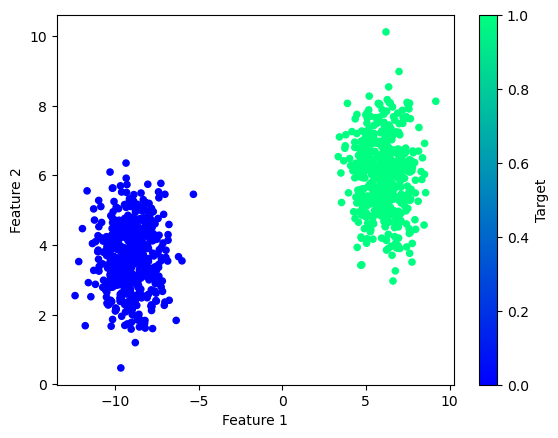

In [5]:
# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [6]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [9]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [10]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [11]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.4974 - accuracy: 0.9227
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4855 - accuracy: 0.9453
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.9467
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.9480
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.9507
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.9520
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.9520
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.9520
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.9533
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.9547
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0892 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0865 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0826 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0814 - accuracy: 1.0000


<AxesSubplot: >

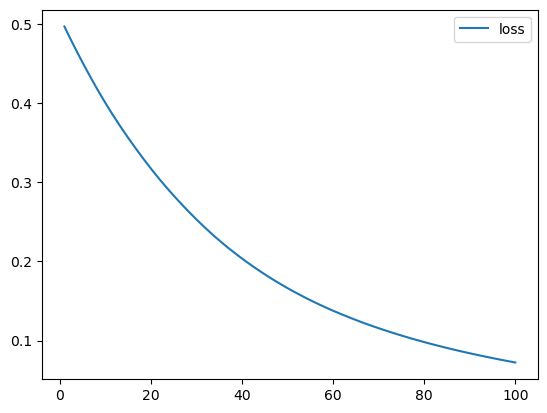

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot: >

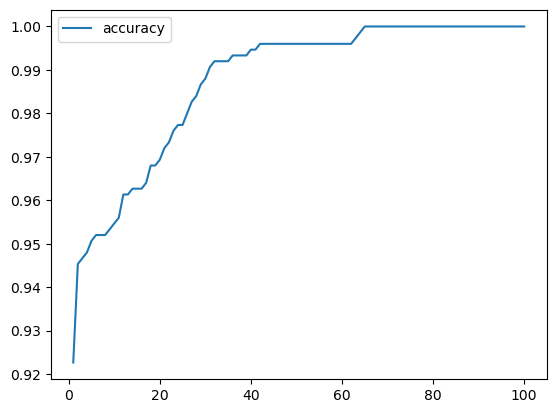

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0736 - accuracy: 1.0000 - 122ms/epoch - 15ms/step
Loss: 0.07364561408758163, Accuracy: 1.0


In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 61ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

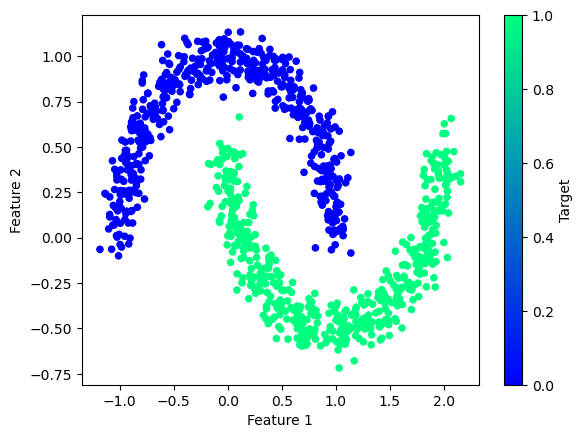

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

# 20.2.4 Nuances of Neural Networks on Nonlinear Numbers

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1509 - accuracy: 0.4733
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0005 - accuracy: 0.5040
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9061 - accuracy: 0.5213
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8400 - accuracy: 0.5387
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7898 - accuracy: 0.5533
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7490 - accuracy: 0.5653
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7142 - accuracy: 0.5933
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.6053
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6568 - accuracy: 0.6160
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.6293
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.8853
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2663 - accuracy: 0.8867
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2659 - accuracy: 0.8880
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2655 - accuracy: 0.8880
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2651 - accuracy: 0.8867
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2646 - accuracy: 0.8893
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2643 - accuracy: 0.8893
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2639 - accuracy: 0.8893
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2636 - accuracy: 0.8880
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.8893


<AxesSubplot: >

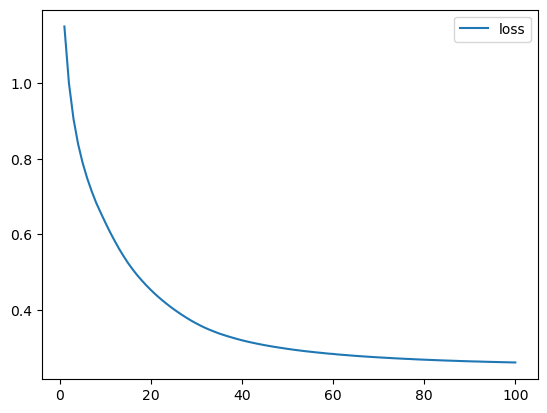

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot: >

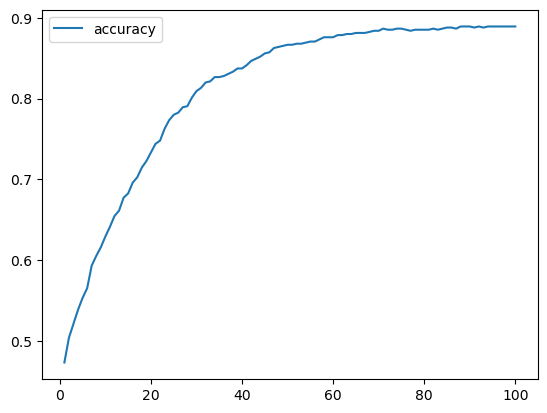

In [22]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [23]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6074 - accuracy: 0.8173
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5775 - accuracy: 0.8373
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5503 - accuracy: 0.8493
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.8547
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.8587
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.8640
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.8653
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8667
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8667
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.8680
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2227 - accuracy: 0.8973
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2221 - accuracy: 0.8973
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2215 - accuracy: 0.8973
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2209 - accuracy: 0.8973
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.8973
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2200 - accuracy: 0.8960
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2193 - accuracy: 0.8973
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.8987
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.8973
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2177 - accuracy: 0.8973


# New Section

In [27]:
ramen_df = pd.read_csv("ramen-ratings.csv")

In [28]:
# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

<AxesSubplot: ylabel='Density'>

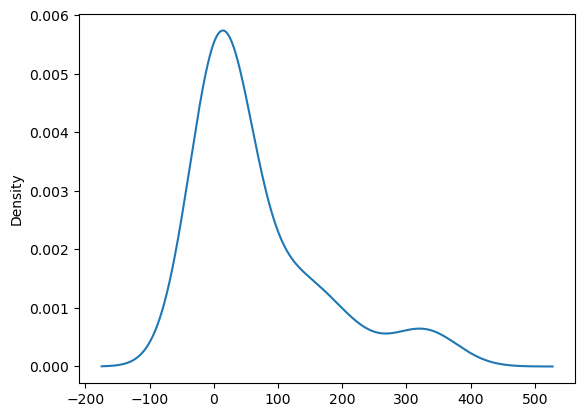

In [29]:
# Visualize the value counts
country_counts.plot.density()

In [30]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [32]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

In [33]:
# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [35]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16764\3440917920.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)


,Review #,Brand,Variety,Style,Stars,Top Ten,0,1,2,3,4,5,6,7,8,9,10,11
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 20.3.4 Span the Gap Using Standardization 

# StandardScaler

In [39]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [40]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [41]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


# Series.plot.density()

# new Jupyter Notebook "DeepLearning_Tabular"

In [42]:
# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [46]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

# 20.4.3 Real Data, Real Practice Preprocessing

In [47]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [48]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [49]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_16764\1667322014.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  attrition_df = attrition_df.drop(attrition_cat,1)


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,21,22,23,24,25,26,27,28,29,30
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [50]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

KeyError: 'Attrition_Yes'

In [51]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [52]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 24        
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6985 - accuracy: 0.5067
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5192 - accuracy: 0.5067
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.5773
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.9253
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3239 - accuracy: 0.9720
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.9867
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2619 - accuracy: 0.9907
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2348 - accuracy: 0.9973
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2081 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1802 - accuracy: 1.0000
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 5.5855e-04 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 5.4215e-04 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 5.2648e-04 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 5.1144e-04 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 4.9705e-04 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 4.8323e-04 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 4.6982e-04 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 4.5710e-04 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 4.4454e-04 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 4.3

In [55]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 3.2231e-04 - accuracy: 1.0000 - 104ms/epoch - 13ms/step
Loss: 0.00032231290242634714, Accuracy: 1.0


In [ ]:
# At the heart of the logistic regression model is the sigmoid curve, which is used to produce the probability (between 0 and 1) of the input data belonging to the first group. This sigmoid curve is the exact same curve used in the sigmoid activation function of a neural network. In fact, a basic neural network using the sigmoid activation function is effectively a logistic regression model:

In [57]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [59]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [60]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.729


In [61]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 0s 1ms/step - loss: 0.7388 - accuracy: 0.3785
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5260
Epoch 3/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6128
Epoch 4/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6370 - accuracy: 0.6597
Epoch 5/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6139 - accuracy: 0.6858
Epoch 6/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5939 - accuracy: 0.7031
Epoch 7/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5766 - accuracy: 0.7222
Epoch 8/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5618 - accuracy: 0.7292
Epoch 9/50
18/18 [==============================] - 0s 973us/step - loss: 0.5488 - accuracy: 0.7396
Epoch 10/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.7465
Epoch 11/50
18/18

In [62]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [63]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [64]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [65]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_16764\2291554867.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tele_df = tele_df.drop(tele_cat,1)


,Age,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [66]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

AttributeError: 'DataFrame' object has no attribute 'Subscribed_yes'

In [67]:
# Create the SVM model
svm = SVC(kernel='linear')

In [ ]:
# Train the model
svm.fit(X_train, y_train)

In [68]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [69]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [70]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 0s 1ms/step - loss: 0.7212 - accuracy: 0.4410
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 0.7010 - accuracy: 0.5069
Epoch 3/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5677
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.6233
Epoch 5/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.6476
Epoch 6/50
18/18 [==============================] - 0s 1000us/step - loss: 0.6603 - accuracy: 0.6788
Epoch 7/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.6962
Epoch 8/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.7205
Epoch 9/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.7378
Epoch 10/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.7500
Epoch 11/50
18/1

In [71]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
loans_df = pd.read_csv('loan_status.csv')
loans_df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [72]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [73]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [74]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

In [75]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_16764\1908271011.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  loans_df = loans_df.drop(loans_cat,1)


,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,16,17,18,19,20,21,22,23,24,25
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [76]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

AttributeError: 'DataFrame' object has no attribute 'Loan_Status_Fully_Paid'

In [77]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.745


In [78]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 1s 1ms/step - loss: 0.6309 - accuracy: 0.6910
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5903 - accuracy: 0.7344
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7604
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.7743
Epoch 5/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5164 - accuracy: 0.7865
Epoch 6/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5002 - accuracy: 0.7847
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7865
Epoch 8/50
18/18 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.7899
Epoch 9/50
18/18 [==============================] - 0s 1ms/step - loss: 0.4678 - accuracy: 0.7917
Epoch 10/50
18/18 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.7951
Epoch 11/50
18/18 [

# 20.6.1 Checkpoints Are Not Just for Video Games

In [79]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [80]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
 1/18 [>.............................] - ETA: 9s - loss: 0.3474 - accuracy: 0.8438
Epoch 1: saving model to checkpoints\weights.01.hdf5
18/18 [==============================] - 1s 5ms/step - loss: 0.3811 - accuracy: 0.8264
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 0.4188 - accuracy: 0.8125
Epoch 2: saving model to checkpoints\weights.02.hdf5
18/18 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8281
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 0.3168 - accuracy: 0.8438
Epoch 3: saving model to checkpoints\weights.03.hdf5
18/18 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8281
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 0.4253 - accuracy: 0.8125
Epoch 4: saving model to checkpoints\weights.04.hdf5
18/18 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8281
Epoch 5/100
 1/18 [>.............................] - ETA: 0s

Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 0.3906 - accuracy: 0.7812
Epoch 36: saving model to checkpoints\weights.36.hdf5
18/18 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8559
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 0.4248 - accuracy: 0.8125
Epoch 37: saving model to checkpoints\weights.37.hdf5
18/18 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8542
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 0.4013 - accuracy: 0.8125
Epoch 38: saving model to checkpoints\weights.38.hdf5
18/18 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8507
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 0.2301 - accuracy: 0.8750
Epoch 39: saving model to checkpoints\weights.39.hdf5
18/18 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8559
Epoch 40/100
 1/18 [>.............................] 

18/18 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8611
Epoch 71/100
 1/18 [>.............................] - ETA: 0s - loss: 0.3367 - accuracy: 0.8750
Epoch 71: saving model to checkpoints\weights.71.hdf5
18/18 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8681
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 0.3826 - accuracy: 0.8125
Epoch 72: saving model to checkpoints\weights.72.hdf5
18/18 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8646
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 0.2818 - accuracy: 0.9375
Epoch 73: saving model to checkpoints\weights.73.hdf5
18/18 [==============================] - 0s 3ms/step - loss: 0.3182 - accuracy: 0.8715
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8750
Epoch 74: saving model to checkpoints\weights.74.hdf5
18/18 [==============================] - 0s 2ms/step

In [81]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: Cannot assign value to variable ' dense_15/kernel:0': Shape mismatch.The variable shape (8, 8), and the assigned value shape (8, 24) are incompatible.

In [83]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [84]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [85]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - loss: 0.7827 - accuracy: 0.4375 - 96ms/epoch - 16ms/step
Loss: 0.7827425599098206, Accuracy: 0.4375
